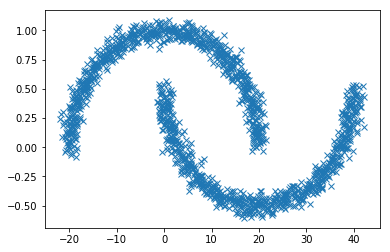

array([[ 36.66468629,   0.12664547],
       [-12.15324139,   0.92611867],
       [  5.26459143,  -0.13716739],
       ...,
       [ 19.36499993,   0.32658377],
       [ 36.40095625,  -0.15610654],
       [ 26.50534434,  -0.34143556]])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

X= noisy_moons[0]
y= noisy_moons[1]

X[:,0] = 20*X[:,0]

plt.plot(X[:,0], X[:,1], 'x')
plt.show()

h = np.zeros(shape=(2,1))
h[1] = 1
X

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def RedNeuronal(X,y,alpha,epochs): 
    w_1 = np.raandom.rand(2,X.shpe[1]+1) #2 Neuronas de la capa siguiente, y en la capa actual el numero de features mas el bias
    w_2 = np.random.rand(2,2+1) #2 Neuronas de la capa siguiente, y en la capa actual el numero de neuronas mas el bias
    w_3 = np.random.rand(2,2+1) #2 Neuronas (2 clases) de la capa de salida, y en la capa actual el numero de neuronas mas el bias
    
    

    for j in range(0,epochs):
        J = 0
        for i in range(0,X.shape[0]):
            
            #One hot encoding
            Y = np.zeros(shape=(2,1))
            Y[y[i]] = 1

            #Forward
            #Para cada muestra
            a_1 = X[i,None].T
            #Se agrega el bias de la capa entrada
            a_1 = np.insert(a_1, 0, 1,axis=0) 
            z_1 = np.dot(w_1,a_1)
            a_2 = sigmoid(z_1)
            #Se agrega el bias de la otra capa
            a_2 = np.insert(a_2, 0, 1,axis=0) 
            z_2 = np.dot(w_2,a_2)
            a_3 = sigmoid(z_2)
            #Se agrega el bias de la otra capa
            a_3 = np.insert(a_3, 0, 1,axis=0)
            z_3 = np.dot(w_3,a_3)
            a_4 = sigmoid(z_3)

            #Backward
            J = J + np.dot((Y-a_4).T,(Y-a_4))
            d_4 = (Y-a_4)*d_sigmoid(z_3)

            d_3 = np.dot(w_3.T,d_4)
            d_3 = np.delete(d_3, 0,axis=0) #Remove d_0
            d_3 = d_3*d_sigmoid(z_2)

            d_2 = np.dot(w_2.T,d_3)
            d_2 = np.delete(d_2, 0,axis=0) #Remove d_0
            d_2 = d_2*d_sigmoid(z_1)

            DE_dw_3 = -np.dot(d_4,a_3.T)
            DE_dw_2 = -np.dot(d_3,a_2.T)
            DE_dw_1 = -np.dot(d_2,a_1.T)

            w_3 = w_3 - alpha*DE_dw_3
            w_2 = w_2 - alpha*DE_dw_2
            w_1 = w_1 - alpha*DE_dw_1

        print(J/2)
    return [w_1,w_2,w_3]

def Predict(X,w_1,w_2,w_3): 
    #Forward
    #Para cada muestra
    a_1 = X[:,None]
    #Se agrega el bias de la capa entrada
    a_1 = np.insert(a_1, 0, 1,axis=0) 
    z_1 = np.dot(w_1,a_1)
    a_2 = sigmoid(z_1)
    #Se agrega el bias de la otra capa
    a_2 = np.insert(a_2, 0, 1,axis=0) 
    z_2 = np.dot(w_2,a_2)
    a_3 = sigmoid(z_2)
    #Se agrega el bias de la otra capa
    a_3 = np.insert(a_3, 0, 1,axis=0)
    z_3 = np.dot(w_3,a_3)
    a_4 = sigmoid(z_3)
    return a_4

In [12]:
[w1,w2,w3] = RedNeuronal(X,y,alpha=0.1,epochs=100)

[[370.37198181]]
[[334.25011791]]
[[293.34827531]]
[[277.42742407]]
[[271.22064609]]
[[267.94242075]]
[[265.89249261]]
[[264.46208547]]
[[263.37874196]]
[[262.50453601]]
[[261.76310902]]
[[261.10908359]]
[[260.51386095]]
[[259.95839681]]
[[259.42911287]]
[[258.91515797]]
[[258.40597546]]
[[257.88813135]]
[[257.33920194]]
[[256.71109725]]
[[255.86277441]]
[[253.9261905]]
[[243.96390018]]
[[230.88783467]]
[[216.18049756]]
[[217.27553776]]
[[199.85812181]]
[[194.30527912]]
[[226.06067873]]
[[194.96106953]]
[[210.80708016]]
[[190.6911568]]
[[186.03912583]]
[[189.09189752]]
[[174.06401241]]
[[174.03100294]]
[[192.90567858]]
[[171.78061936]]
[[163.62135012]]
[[174.72308976]]
[[174.80899386]]
[[168.47232497]]
[[162.33886066]]
[[169.2382475]]
[[178.53474153]]
[[169.45459339]]
[[165.31886429]]
[[168.28699388]]
[[159.81499858]]
[[169.62530574]]
[[159.28987327]]
[[161.00010426]]
[[168.6711849]]
[[158.93523779]]
[[159.37839484]]
[[158.86478815]]
[[164.50263798]]
[[162.89316191]]
[[171.07423031]]
[

In [13]:
predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X[i],w1,w2,w3)))

# Este es el rendimiento del entrenamiento sin estandizar los datos

In [14]:
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print(Accuracy)

0.8086666666666666


# Estandarizando con Min-Max
$$X_{norm} = \frac{X-\min(X)}{\max(X)-\min(X)}$$

In [15]:
X_norm = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
[w1,w2,w3] = RedNeuronal(X_norm,y,alpha=0.1,epochs=20)

predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))
    
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print('Accuracy con estandarización MIN-MAX',Accuracy)

[[378.75034751]]
[[375.48021842]]
[[373.74112747]]
[[367.98932387]]
[[336.49728081]]
[[224.01774757]]
[[152.28485445]]
[[135.94148209]]
[[130.79454102]]
[[128.88324624]]
[[128.15607633]]
[[127.87367271]]
[[127.76045439]]
[[127.71165392]]
[[127.68592907]]
[[127.66639321]]
[[127.64590297]]
[[127.62116859]]
[[127.59026852]]
[[127.55156709]]
Accuracy con estandarización MIN-MAX 0.888


# Estandarizando con Zscore
$$X_{norm} = \frac{X-\mu}{\sigma}$$

In [17]:
X_norm = (X-np.mean(X,axis=0))/(np.std(X,axis=0))
[w1,w2,w3] = RedNeuronal(X_norm,y,alpha=0.1,epochs=20)

predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))
    
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print('Accuracy con estandarización Z-score',Accuracy)

[[380.78576357]]
[[339.80634694]]
[[201.23844479]]
[[144.57415529]]
[[134.93978136]]
[[132.1620831]]
[[130.91350109]]
[[130.13183458]]
[[129.53022926]]
[[129.02147009]]
[[128.57919627]]
[[128.19521026]]
[[127.86465223]]
[[127.58151607]]
[[127.33836201]]
[[127.12728019]]
[[126.94077098]]
[[126.7722067]]
[[126.61596622]]
[[126.46740356]]
Accuracy con estandarización Z-score 0.884


## Dependiendo de los rangos de los datos, algunas estandarizaciones pueden funcionar mejor que otras. También dependiendo de la estandarización va a cambiar el alpha que sea ideal.

## Veamos como luce la frontera de división de clases

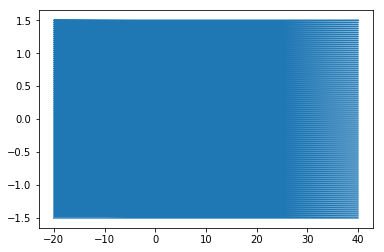

In [18]:
x1 = np.linspace(-20,40,1000)
x2 = np.linspace(-1.5,1.5,100)
x1, x2 = np.meshgrid(x1, x2,indexing='xy')

x1 = x1.reshape((x1.shape[0]*x1.shape[1], 1))
x2 = x2.reshape((x2.shape[0]*x2.shape[1], 1))

plt.plot(x1,x2)
plt.show() #Estamos llenando la superficie de puntos, para luego evaluarlos en la red neuronal

Xnew = np.concatenate((x1,x2),axis=1)

In [19]:
X_norm = (Xnew-np.mean(X,axis=0))/(np.std(X,axis=0))
predicted = list()
for i in range(0,Xnew.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))

predicted = np.array(predicted)

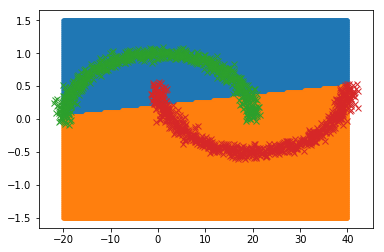

In [20]:
plt.plot(Xnew[predicted==0,0],Xnew[predicted==0,1],'.')
plt.plot(Xnew[predicted==1,0],Xnew[predicted==1,1],'.')
plt.plot(X[y==0,0], X[y==0,1], 'x')
plt.plot(X[y==1,0], X[y==1,1], 'x')

plt.show()

# Cambiemos la arquitectura de la red

In [21]:
def RedNeuronal(X,y,alpha,epochs): 
    w_1 = np.random.rand(10,X.shape[1]+1) #(10) Neuronas de la capa siguiente, y en la capa actual el numero de features mas el bias
    w_2 = np.random.rand(10,10+1) #2 Neuronas de la capa siguiente, y en la capa actual el numero de neuronas (10) mas el bias
    w_3 = np.random.rand(3,10+1) #3 Neuronas de la capa de salida, y en la capa actual el numero de neuronas (10) mas el bias
    
    

    for j in range(0,epochs):
        J = 0
        for i in range(0,X.shape[0]):
            
            #One hot encoding
            Y = np.zeros(shape=(3,1))
            Y[y[i]] = 1

            #Forward
            #Para cada muestra
            a_1 = X[i,None].T
            #Se agrega el bias de la capa entrada
            a_1 = np.insert(a_1, 0, 1,axis=0) 
            z_1 = np.dot(w_1,a_1)
            a_2 = sigmoid(z_1)
            #Se agrega el bias de la otra capa
            a_2 = np.insert(a_2, 0, 1,axis=0) 
            z_2 = np.dot(w_2,a_2)
            a_3 = sigmoid(z_2)
            #Se agrega el bias de la otra capa
            a_3 = np.insert(a_3, 0, 1,axis=0)
            z_3 = np.dot(w_3,a_3)
            a_4 = sigmoid(z_3)

            #Backward
            J = J + np.dot((Y-a_4).T,(Y-a_4))
            d_4 = (Y-a_4)*d_sigmoid(z_3)

            d_3 = np.dot(w_3.T,d_4)
            d_3 = np.delete(d_3, 0,axis=0) #Remove d_0
            d_3 = d_3*d_sigmoid(z_2)

            d_2 = np.dot(w_2.T,d_3)
            d_2 = np.delete(d_2, 0,axis=0) #Remove d_0
            d_2 = d_2*d_sigmoid(z_1)

            DE_dw_3 = -np.dot(d_4,a_3.T)
            DE_dw_2 = -np.dot(d_3,a_2.T)
            DE_dw_1 = -np.dot(d_2,a_1.T)

            w_3 = w_3 - alpha*DE_dw_3
            w_2 = w_2 - alpha*DE_dw_2
            w_1 = w_1 - alpha*DE_dw_1

        print(J/2)
    return [w_1,w_2,w_3]

In [42]:
X_norm = (X-np.mean(X,axis=0))/(np.std(X,axis=0))
[w1,w2,w3] = RedNeuronal(X_norm,y,alpha=0.1,epochs=20)

predicted = list()
for i in range(0,X.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))
    
Accuracy = np.sum(np.array(predicted) == y)/X.shape[0]
print('Accuracy con estandarización MIN-MAX',Accuracy)

[[ 664.97660719]]
[[ 364.53591895]]
[[ 176.21069402]]
[[ 139.07732656]]
[[ 132.67852707]]
[[ 129.76189736]]
[[ 126.81040695]]
[[ 121.82743266]]
[[ 111.66700084]]
[[ 91.90956715]]
[[ 65.71501192]]
[[ 43.96764909]]
[[ 30.01649335]]
[[ 21.58297626]]
[[ 16.32334185]]
[[ 12.86587606]]
[[ 10.47658003]]
[[ 8.75379089]]
[[ 7.46693777]]
[[ 6.47705275]]
Accuracy con estandarización MIN-MAX 1.0


# 100% de accuracy!! Obviamente estamos sobreentrenando, debemos implementar una validación cruzada o bootstraping para encontrar la mejor arquitectura

## Veamos como luce la frontera de división de clases

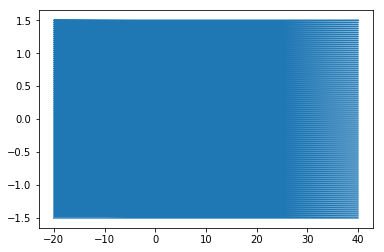

In [22]:
x1 = np.linspace(-20,40,1000)
x2 = np.linspace(-1.5,1.5,100)
x1, x2 = np.meshgrid(x1, x2,indexing='xy')

x1 = x1.reshape((x1.shape[0]*x1.shape[1], 1))
x2 = x2.reshape((x2.shape[0]*x2.shape[1], 1))

plt.plot(x1,x2)
plt.show() #Estamos llenando la superficie de puntos, para luego evaluarlos en la red neuronal

Xnew = np.concatenate((x1,x2),axis=1)

In [23]:
X_norm = (Xnew-np.mean(X,axis=0))/(np.std(X,axis=0))
predicted = list()
for i in range(0,Xnew.shape[0]):
    predicted.append(np.argmax(Predict(X_norm[i],w1,w2,w3)))

predicted = np.array(predicted)

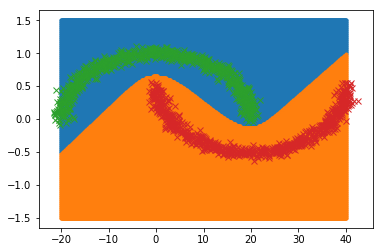

In [77]:
plt.plot(Xnew[predicted==0,0],Xnew[predicted==0,1],'.')
plt.plot(Xnew[predicted==1,0],Xnew[predicted==1,1],'.')
plt.plot(X[y==0,0], X[y==0,1], 'x')
plt.plot(X[y==1,0], X[y==1,1], 'x')

plt.show()